# Pemodelan ARIMA

**Analisis deret waktu** diterapkan pada data berkala (time series) dengan asumsi stasioner agar menghasilkan model yang baik

Deret waktu dapat dinyatakan sebagai Yₜ dengan indeks waktu t (t=1,2,...,T).

Komponen Deret Waktu:
* **Tren**: Pola naik atau turun seiring waktu.

* **Siklus**: Pergerakan naik-turun berulang dalam jangka panjang (2-10 tahun).

* **Musiman**: Fluktuasi teratur dalam satu tahun akibat faktor musiman.

* **Acak**: Fluktuasi tanpa pola yang tidak dapat diprediksi, bersifat sementara.

**Stasioneritas** adalah kondisi data yang tidak berubah drastis dalam waktu tertentu. Data yang tidak stasioner harus ditransformasi. untuk pengujiannya dapat dilakukan dengan uji stasioneritas terhadap ragam dan uji stasioneritas terhadap rata-rata.

Time Lag
Time lag merupakan penggeseran data ke periode sebelumnya, ditulis sebagai Yₜ₋ⱼ.

Metode differencing digunakan untuk membuat data stasioner:

* First difference: ΔYₜ = Yₜ - Yₜ₋₁

* Second difference: Δ²Yₜ = ΔYₜ - ΔYₜ₋₁



## Contoh
Misalkan akan diidentifikasi pola penjualan mobil bulanan dari suatu perusahaan. data dapat didownload di [car sales](https://www.kaggle.com/datasets/dmi3kno/newcarsalesnorway?select=norway_new_car_sales_by_month.csv).  Data yang digunakan mencakup periode bulanan mulai dari tahun 2007 hingga awal tahun 2017.




In [5]:
data = read.csv("norway_new_car_sales_by_make.csv")
head(data)

,Year,Month,Make,Quantity,Pct
,<int>,<int>,<chr>,<int>,<dbl>
1,2007,1,Toyota,2884,22.7
2,2007,1,Volkswagen,2521,19.9
3,2007,1,Peugeot,1029,8.1
4,2007,1,Ford,870,6.9
5,2007,1,Volvo,693,5.5
6,2007,1,Skoda,665,5.2


In [5]:
summary(data)

      Year          Month           Make              Quantity     
 Min.   :2007   Min.   : 1.00   Length:4377        Min.   :   1.0  
 1st Qu.:2009   1st Qu.: 3.00   Class :character   1st Qu.:  14.0  
 Median :2011   Median : 6.00   Mode  :character   Median : 153.0  
 Mean   :2011   Mean   : 6.46                      Mean   : 307.8  
 3rd Qu.:2014   3rd Qu.: 9.00                      3rd Qu.: 461.0  
 Max.   :2017   Max.   :12.00                      Max.   :3017.0  
      Pct        
 Min.   : 0.000  
 1st Qu.: 0.100  
 Median : 1.400  
 Mean   : 2.762  
 3rd Qu.: 4.200  
 Max.   :22.700  

In [6]:
str(data) #tipe data

'data.frame':	4377 obs. of  5 variables:
 $ Year    : int  2007 2007 2007 2007 2007 2007 2007 2007 2007 2007 ...
 $ Month   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Make    : chr  "Toyota" "Volkswagen" "Peugeot" "Ford" ...
 $ Quantity: int  2884 2521 1029 870 693 665 622 599 423 362 ...
 $ Pct     : num  22.7 19.9 8.1 6.9 5.5 5.2 4.9 4.7 3.3 2.9 ...


In [7]:
# Mengelompokkan data berdasarkan tahun dan bulan
library(dplyr)
data_grouped <- data %>%
  group_by(Year, Month) %>%
  summarise(Total_Sales = sum(Quantity)) %>%
  arrange(Year, Month)
data_grouped

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


Year,Month,Total_Sales
<int>,<int>,<int>
2007,1,12685
2007,2,9793
2007,3,11264
2007,4,8854
2007,5,12007
2007,6,11083
2007,7,12062
2007,8,10786
2007,9,9340


In [9]:
# Membuat data time series
data_ts <- ts(data_grouped$Total_Sales, start=c(2007,1), frequency=12)
data_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2007,12685,9793,11264,8854,12007,11083,12062,10786,9340,11646,10453,9222
2008,9901,10567,9506,11704,10217,9670,9605,7833,8453,8390,6952,7819
2009,5353,6287,7601,7504,7421,7581,9394,7967,9530,10187,9600,10250
2010,9697,9094,11486,10677,9896,11119,11507,10414,11137,10683,11908,10136
2011,10372,10543,12901,11330,13005,10354,11189,11464,11737,11543,12357,11550
2012,10838,10925,13051,10876,12612,11053,11920,11790,11134,12413,11986,9369
2013,11639,11322,10735,13988,12012,10948,11312,11660,12168,12893,12079,11395
2014,11385,11246,13861,12115,12337,11441,11690,11444,11585,12963,11486,12649
2015,10523,10685,14159,12782,12036,14207,12394,12604,12421,13197,12600,13078
2016,10991,12222,13875,14116,12864,13681,11040,13232,13854,11932,13194,13602


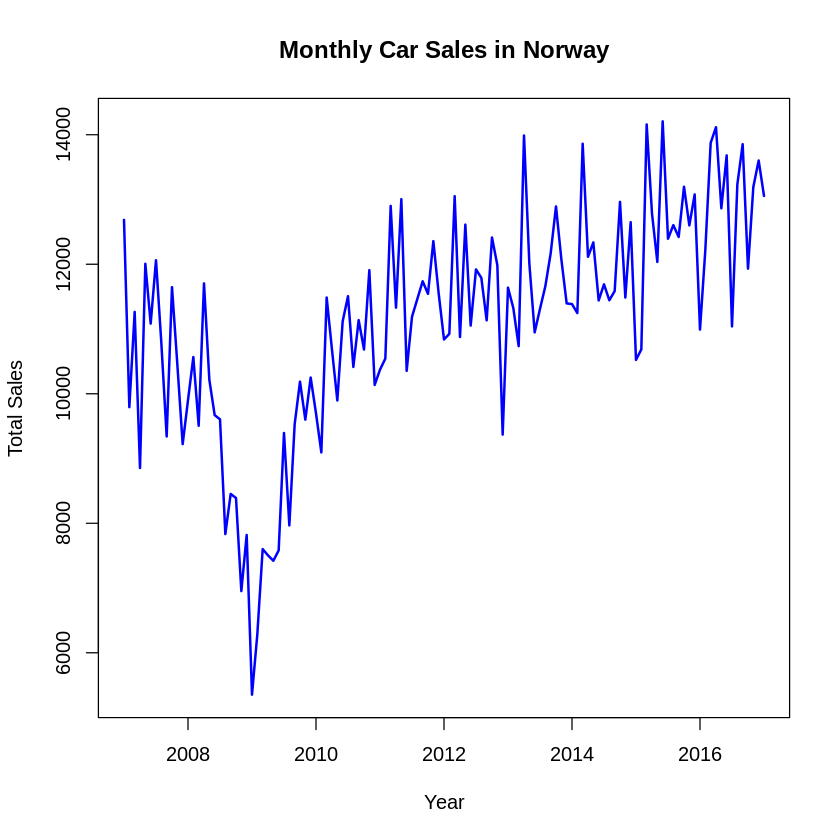

In [10]:
# Plot data time series
plot(data_ts, main="Monthly Car Sales in Norway", ylab="Total Sales", xlab="Year", col="blue", lwd=2)

# Pemeriksaan Stasioneritas
Pada tahap ini, dilakukan pemeriksaan stasioneritas terhadap rata-rata menggunakan uji Augmented Dickey-Fuller (ADF). Jika data menunjukkan ketidakstasioneran terhadap rata-rata (nilai p-value > 0.05), maka dilakukan differencing untuk mencapai stasioneritas terhadap rata-rata. Sedangkan untuk pemeriksaan stasioneritas terhadap ragam, dapat diamati melalui pola visual pada plot data atau diuji secara formal menggunakan plot Box-Cox. Jika lambda dalam plot Box-Cox dekat dengan 1, maka data dianggap stasioner terhadap ragam; jika terdapat perubahan fluktuasi yang signifikan seiring waktu, maka perlu dilakukan transformasi Box-Cox atau metode lainnya.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




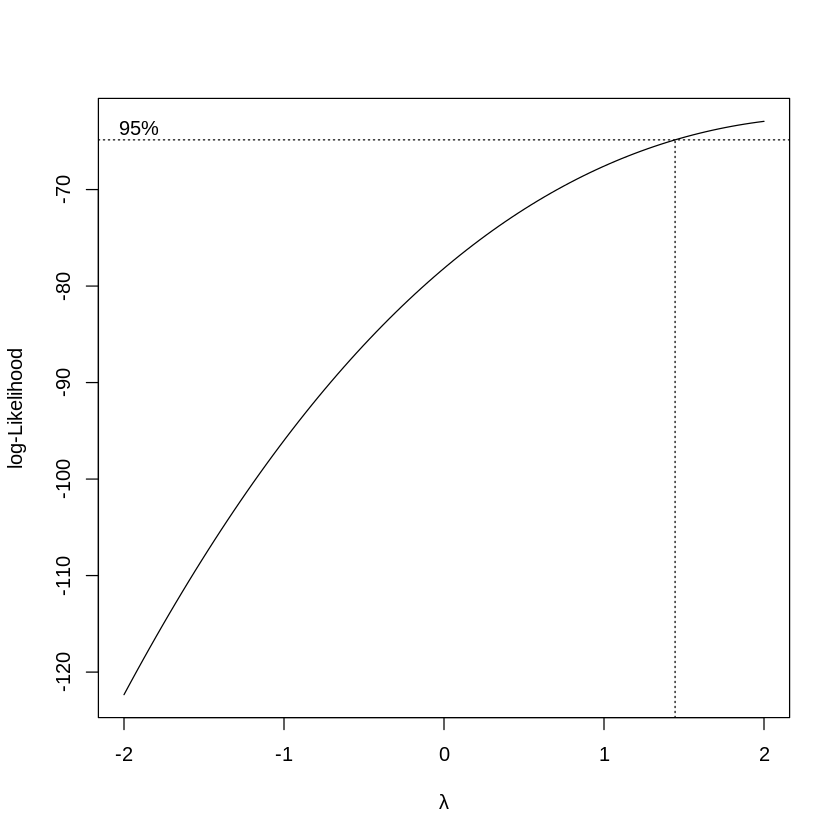

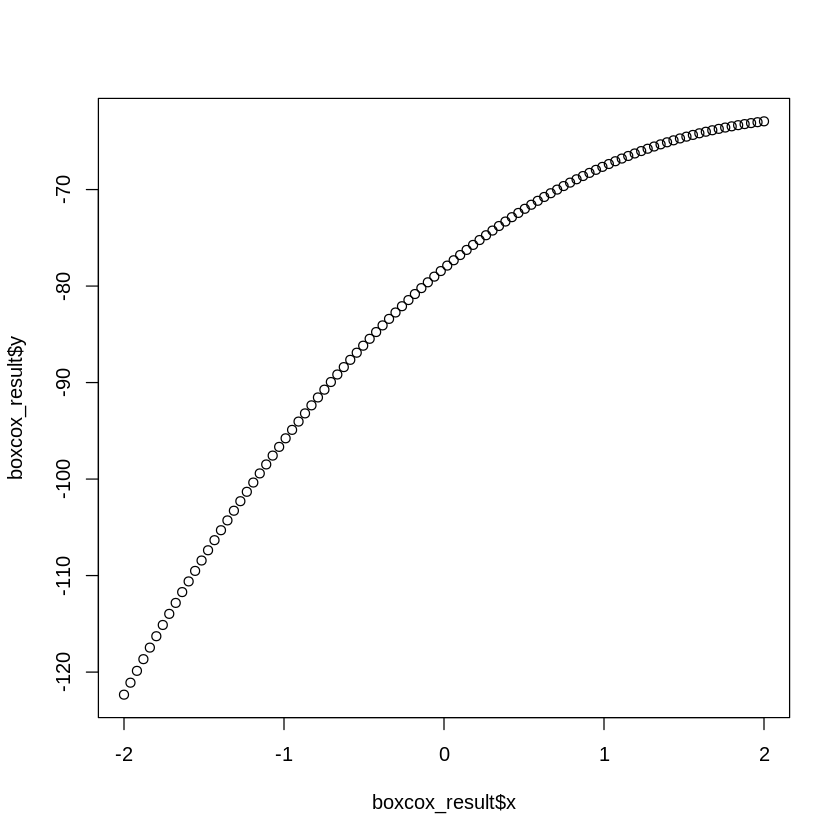

In [15]:
# Uji stasioneritas terhadap ragam menggunakan plot Box-Cox
install.packages("MASS")
library(MASS)
boxcox_result <- boxcox(lm(data_ts ~ 1))
plot(boxcox_result)

Dari gambar sudah terlihat bahwa lambda dekat dengan 1, sehingga dapat dikatakan data dianggap stasioner terhadap ragam

In [12]:
# Memeriksa stasioneritas
# Uji Augmented Dickey-Fuller
install.packages("tseries")
library(tseries)
adf.test(data_ts)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




	Augmented Dickey-Fuller Test

data:  data_ts
Dickey-Fuller = -2.6751, Lag order = 4, p-value = 0.2961
alternative hypothesis: stationary


Terlihat dari uji DF bahwa p-value=0.2961 > dari 0.05, maka harus dilakukan differencing.

Warning message in adf.test(data_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  data_diff
Dickey-Fuller = -8.1476, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


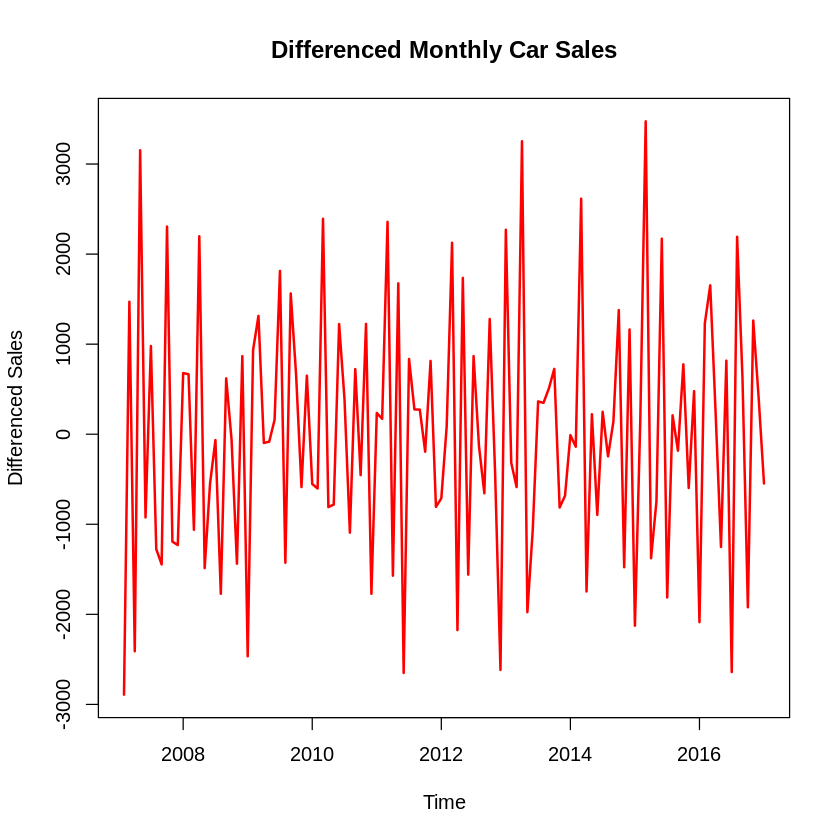

In [13]:
# Jika tidak stasioner, lakukan differencing
if(adf.test(data_ts)$p.value > 0.05){
  data_diff <- diff(data_ts)
  plot(data_diff, main="Differenced Monthly Car Sales", ylab="Differenced Sales", col="red", lwd=2)
  adf.test(data_diff)
}

sudah terlihat bahwa dari uji DF nilai p-value=0.01 < 0.05

## Menentukan Model ARIMA
Setelah data dipastikan stasioner terhadap rata-rata dan ragam, langkah berikutnya adalah menentukan model ARIMA yang sesuai. Pemilihan model dilakukan secara otomatis menggunakan fungsi auto.arima() dari paket forecast, yang akan mencari kombinasi terbaik dari parameter (p, d, q) berdasarkan kriteria informasi seperti AIC (Akaike Information Criterion).

* p (autoregressive order): banyaknya lag dari variabel dependen yang digunakan sebagai prediktor.

* d (degree of differencing): banyaknya differencing (pembedaan) yang perlu dilakukan agar data menjadi stasioner.

* q (moving average order): banyaknya lag dari error (residual) masa lalu yang digunakan dalam model.

In [16]:
# Menentukan model ARIMA optimal
install.packages("forecast")
library(forecast)
auto_model <- auto.arima(data_ts)
summary(auto_model)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’




Series: data_ts 
ARIMA(0,1,2)(1,0,1)[12] 

Coefficients:
         ma1     ma2    sar1     sma1
      -0.865  0.2706  0.8750  -0.6927
s.e.   0.100  0.0994  0.1149   0.1778

sigma^2 = 1121067:  log likelihood = -1005.86
AIC=2021.72   AICc=2022.24   BIC=2035.66

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set 34.48725 1036.698 828.5122 -0.4354995 7.892494 0.6128964
                   ACF1
Training set 0.03260806

dari hasil summary model, terlihat bahwa
model ARIMA yang didapat adalah ARIMA(0,1,2)(1,0,1)[12], artinya (dilihat dari kiri ke kanan dari model ARIMA(komponen non musiman)(komponen musiman)):

* 0 = tidak ada komponen autoregressive (AR) biasa
* 1 = dilakukan pembedaan satu kali (first differencing) untuk mencapai stasioneritas terhadap rata-rata
* 2 =ada dua komponen moving average (MA) biasa
* 1 = ada satu komponen seasonal AR
* 0 = tidak dilakukan differencing musiman
* 1 = ada satu komponen seasonal MA
* 12 = data memiliki pola musiman tahunan

selanjutnya dilihat dari nilai MAPE =7.89 <10% dapat diartikan bahwa model yang didapat cocok dan cukup baik.

kemudian dilihat dari nilai ACF1 sudah mendekati nol, artinya residual sudah hampir white noise.

## Diagnostik Model
Pada tahap ini, dilakukan evaluasi terhadap residual model untuk memastikan bahwa residual menyerupai white noise, yaitu tidak memiliki pola autokorelasi yang signifikan dan memiliki rata-rata nol serta ragam konstan. Ini penting agar model dapat dianggap telah menangkap seluruh pola sistematis dalam data.


	Ljung-Box test

data:  Residuals from ARIMA(0,1,2)(1,0,1)[12]
Q* = 31.281, df = 20, p-value = 0.05158

Model df: 4.   Total lags used: 24



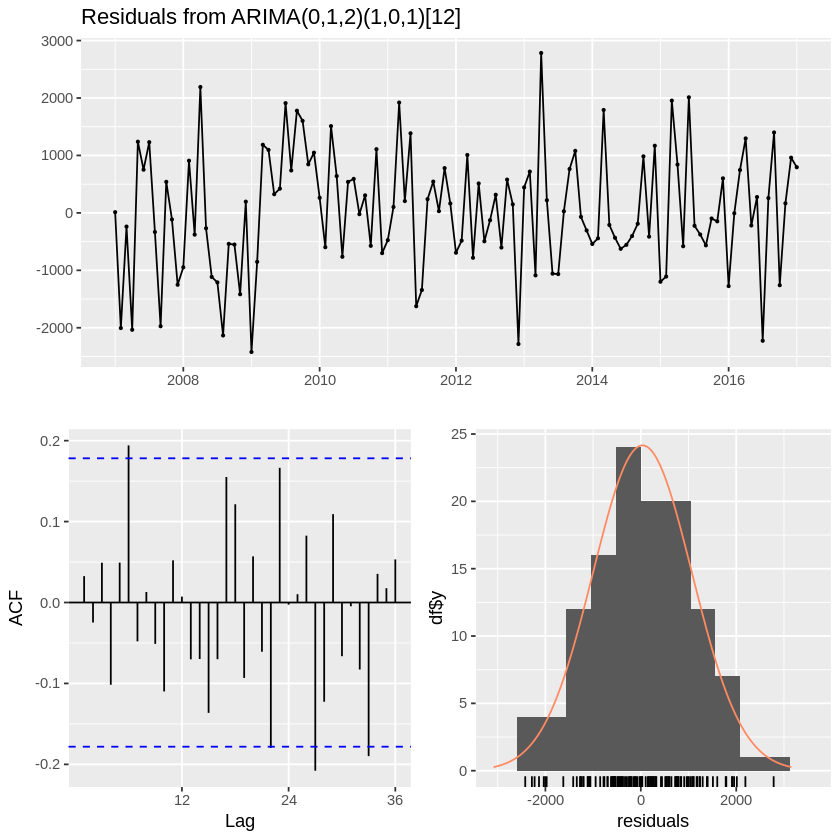

In [17]:
# Plot residu model
checkresiduals(auto_model)

terlihat dari uji ljung-box (Hipotesis nol (H₀) dari uji Ljung-Box: "Residual tidak memiliki autokorelasi, alias residual = white noise.") bahwa tak tolak H0 karena p-value = 0.05158 > alpha = 0.05. ini dapat diartikan bahwa  residual tidak menunjukkan autokorelasi yang signifikan (residual sudah mendekati white noise).

kemudian terlihat dari grafik residual bahwa pola residual dari waktu ke waktu  sudah acak.

dilihat dari grafik ACF terlihat ada garis yang melewati garis putus-putus biru namun hanya sedikit. dapat diasumsikan secara keseluruhan bahwa autokorelasi sangat kecil.

selanjutnya grafik histogram residual terlihat seperti lonceng, artinya sebaran residual mendekati distribusi normal.

dapat disimpulkan model sudah cukup baik dan layak digunakan untuk peramalan.

## Peramalan
dari langkah sebelumnya model ARIMA yang dibentuk sudah sesuai dan bisa digunakan untuk peramalan. Peramalan dilakukan untuk memprediksi nilai penjualan mobil dalam 12 bulan ke depan berdasarkan model yang telah dipilih.

         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Feb 2017       12833.08 11476.10 14190.06 10757.753 14908.40
Mar 2017       14212.83 12843.56 15582.10 12118.708 16306.95
Apr 2017       13973.94 12498.22 15449.66 11717.027 16230.86
May 2017       13667.27 12092.29 15242.26 11258.539 16076.00
Jun 2017       13816.71 12148.36 15485.07 11265.182 16368.25
Jul 2017       13254.34 11497.57 15011.11 10567.587 15941.09
Aug 2017       13607.74 11766.79 15448.68 10792.249 16423.22
Sep 2017       13754.27 11832.83 15675.71 10815.683 16692.85
Oct 2017       13735.14 11736.46 15733.83 10678.413 16791.88
Nov 2017       13707.05 11633.98 15780.11 10536.568 16877.52
Dec 2017       13734.34 11589.48 15879.19 10454.066 17014.61
Jan 2018       13249.74 11035.40 15464.07  9863.201 16636.27


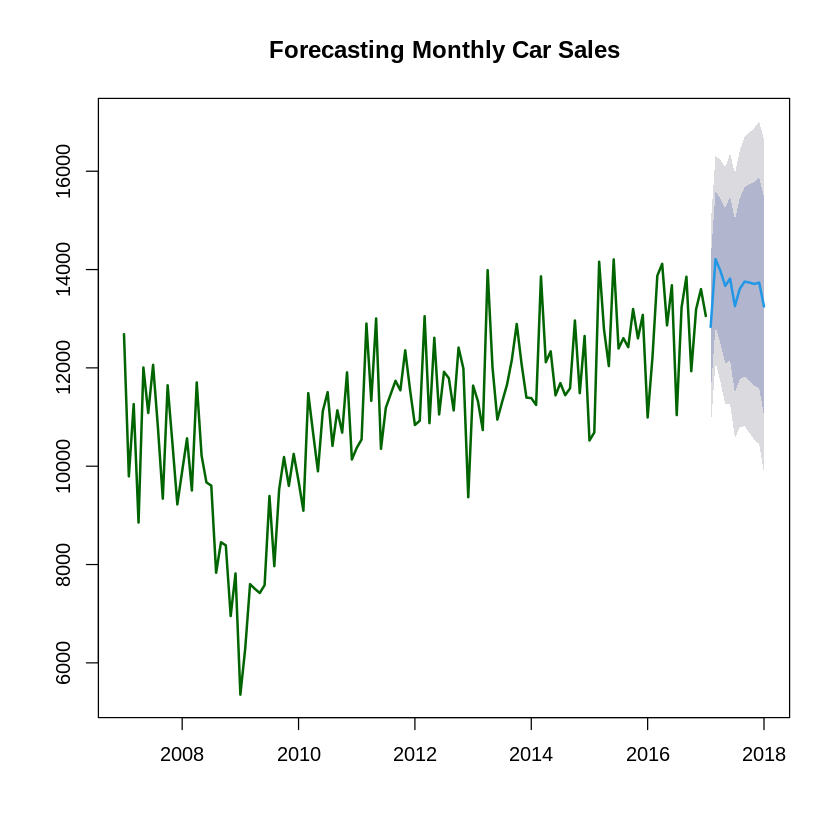

In [18]:
# Peramalan 12 bulan ke depan
forecast_result <- forecast(auto_model, h=12)
plot(forecast_result, main="Forecasting Monthly Car Sales", col="darkgreen", lwd=2)
print(forecast_result)

peramalan dilakukan untuk rata-rata jumlah mobil yang diperkirakan terjual setiap bulan mulai Februari 2017 sampai Januari 2018.

terlihat bahwa diprediksi rata-rata penjualan mobil dibulan februari 2017 adalah 12,833 unit dengan rentang kepercayaan 95% adalah antara 10,757 unit dan 14,998 unit.



